In [1]:
from fly_analysis import trajectory, filtering, braidz, processing, plotting
import numpy as np

In [2]:
root_folder = "/home/buchsbaum/mnt/DATA/Experiments/"
files = ["20240906_155454.braidz", "20240904_160247.braidz", "20240902_135048.braidz", "20240829_103302.braidz", "20240828_110359.braidz", "20240822_105738.braidz"]

df, stim = braidz.read_multiple_braidz(files, root_folder)

Reading /home/buchsbaum/mnt/DATA/Experiments/20240906_155454.braidz using pyarrow
Reading /home/buchsbaum/mnt/DATA/Experiments/20240904_160247.braidz using pyarrow


2024-09-10 15:21:05,273 [INFO] Can't find `stim` in 20240904_160247.braidz, skipping.


Reading /home/buchsbaum/mnt/DATA/Experiments/20240902_135048.braidz using pyarrow
Reading /home/buchsbaum/mnt/DATA/Experiments/20240829_103302.braidz using pyarrow
Reading /home/buchsbaum/mnt/DATA/Experiments/20240828_110359.braidz using pyarrow


2024-09-10 15:21:11,900 [INFO] Can't find `stim` in 20240828_110359.braidz, skipping.


Reading /home/buchsbaum/mnt/DATA/Experiments/20240822_105738.braidz using pyarrow


In [3]:
data_combined = processing.extract_stimulus_centered_data(df, stim, padding=20)
print(f"Original stim length: {len(stim)}")
print(f"Trajectories left after filtering: {len(data_combined['angular_velocity'])}")

2024-09-10 15:21:14,752 [INFO] Skipping 3021 - too short. (205, 355, 337)
2024-09-10 15:21:14,777 [INFO] Skipping 5496 - too short. (120, 270, 264)
2024-09-10 15:21:14,868 [INFO] Skipping 22324 - too short. (174, 324, 286)
2024-09-10 15:21:14,885 [INFO] Skipping 22490 - too short. (105, 255, 232)
2024-09-10 15:21:14,933 [INFO] Skipping 35518 - too short. (121, 271, 220)
2024-09-10 15:21:14,952 [INFO] Skipping 58892 - too short. (3031, 3181, 3131)
2024-09-10 15:21:14,987 [INFO] Skipping 62432 - too short. (93, 243, 218)
2024-09-10 15:21:15,023 [INFO] Skipping 3021 - too short. (205, 355, 337)
2024-09-10 15:21:15,049 [INFO] Skipping 5496 - too short. (120, 270, 264)
2024-09-10 15:21:15,116 [INFO] Skipping 22324 - too short. (174, 324, 286)
2024-09-10 15:21:15,129 [INFO] Skipping 22490 - too short. (105, 255, 232)
2024-09-10 15:21:15,167 [INFO] Skipping 35518 - too short. (121, 271, 220)
2024-09-10 15:21:15,183 [INFO] Skipping 58892 - too short. (3031, 3181, 3131)
2024-09-10 15:21:15,197 

Original stim length: 136
Trajectories left after filtering: 88


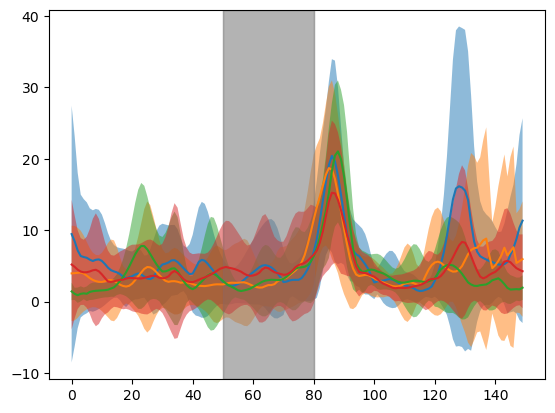

In [9]:
from matplotlib import colormaps
import matplotlib.pyplot as plt
colors = colormaps["tab10"]

fig, ax = plt.subplots()

for i, exp_num in enumerate(np.unique(data_combined["exp_num"])):
    exp_num_idx = data_combined["exp_num"] == exp_num
    plotting.plot_mean_and_std(data_combined["angular_velocity"][exp_num_idx], abs_value=True, shaded_area=[50, 80], ax=ax)